# DS 3000 - Assignment 5

**Student Name**: Ryan Tietjen
**Date**: 02/10/2004


### Submission Instructions
Submit this `ipynb` file to canvas.

The `ipynb` format stores outputs from the last time you ran the notebook.  (When you open a notebook it has the figures and outputs of the last time you ran it too).  To ensure that your submitted `ipynb` file represents your latest code, make sure to give a fresh run `Kernel > Restart & Run All` just before uploading the `ipynb` file to Canvas.

### Academic Integrity

**Writing your homework is an individual effort.**  You may discuss general python problems with other students but under no circumstances should you observe another student's code which was written for this assignment, from this year or past years.  Pop into office hours or DM us in MS Teams if you have a specific question about your work or if you would like another pair of eyes or talk through your code.

Don't forget to cite websites which helped you solve a problem in a unique way.  You can do this in markdown near the code or with a simple one-line comment. You do not need to cite the official python documentation.

**Documentation / style counts for credit**  Please refer to the Pep-8 style, to improve the readability and consistency of your Python code. For more information, read the following article [How to Write Beautiful Python Code With PEP 8](https://realpython.com/python-pep8/) or ask your TA's for tips.

**NOTE:<span style='color:red'> Write python expressions to answer ALL questions below and ensure that you use the `print()` function to display the output.</span>** Each question should be answered in a new code cell. For example, your solution for question 1.1 should be in a different code cell from your solution for question 1.2.

## Question 1: 

(0 pts) Load the data directly from the url into a dataframe


In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("https://data.ny.gov/api/views/ngbt-9rwf/rows.csv")
print(df.head(5))

   Year County of Program Location Program Category  \
0  2007                     Albany           Crisis   
1  2007                     Albany           Crisis   
2  2007                     Albany           Crisis   
3  2007                     Albany           Crisis   
4  2007                     Albany           Crisis   

                     Service Type      Age Group Primary Substance Group  \
0  Medical Managed Detoxification       Under 18                  Heroin   
1  Medical Managed Detoxification  18 through 24              All Others   
2  Medical Managed Detoxification  18 through 24           Other Opioids   
3  Medical Managed Detoxification  18 through 24                  Heroin   
4  Medical Managed Detoxification  18 through 24                 Alcohol   

   Admissions  
0           4  
1           2  
2           6  
3         132  
4          35  


## Question 2: 
(5 pts) Evaluate the dataset to determine if ALL variables are represented in their expected type. Convert variables to suitable data types (if needed) and perform at least one additional data preparation step. 



In [3]:
print(df.dtypes)
# All types look good.

#Drop rows with null values
df = df.dropna()

print(df.head(5))

Year                           int64
County of Program Location    object
Program Category              object
Service Type                  object
Age Group                     object
Primary Substance Group       object
Admissions                     int64
dtype: object
   Year County of Program Location Program Category  \
0  2007                     Albany           Crisis   
1  2007                     Albany           Crisis   
2  2007                     Albany           Crisis   
3  2007                     Albany           Crisis   
4  2007                     Albany           Crisis   

                     Service Type      Age Group Primary Substance Group  \
0  Medical Managed Detoxification       Under 18                  Heroin   
1  Medical Managed Detoxification  18 through 24              All Others   
2  Medical Managed Detoxification  18 through 24           Other Opioids   
3  Medical Managed Detoxification  18 through 24                  Heroin   
4  Medical Manag

## Question 3: 

(10 pts) Visualize the distribution of Age Groups, Program Category, Primary Substance Group, and Admissions. Ensure that you choose an appropriate graph based on the type of data. Explain each chart.

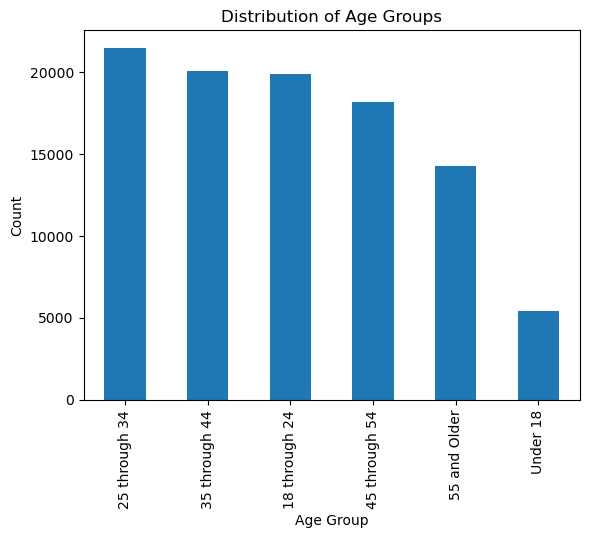

In [4]:
age = df['Age Group'].value_counts()
age.plot(kind='bar')
plt.title('Distribution of Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()
#This bar chart displays the frequency of each age group within the dataset. 
#The x-axis shows the age groups, and the y-axis shows the count of each age group

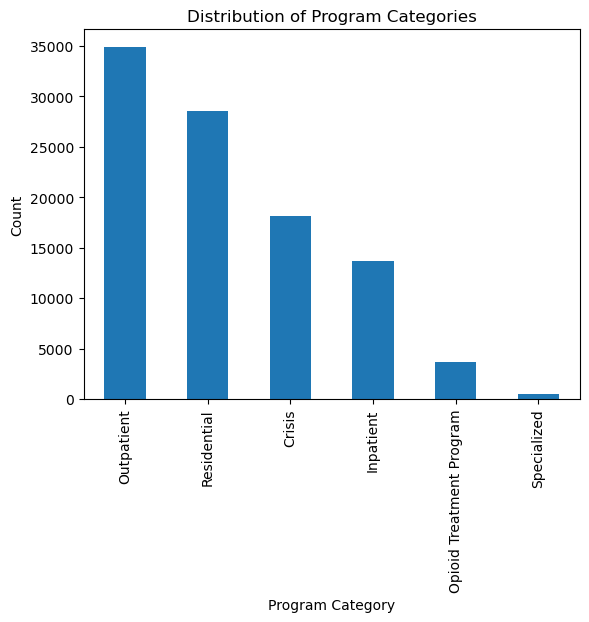

In [5]:
program = df['Program Category'].value_counts()
program.plot(kind='bar')
plt.title('Distribution of Program Categories')
plt.xlabel('Program Category')
plt.ylabel('Count')
plt.show()
#This bar chart displays the frequency of each program category within the dataset. 
#The x-axis shows the program category, and the y-axis shows the count of each program category

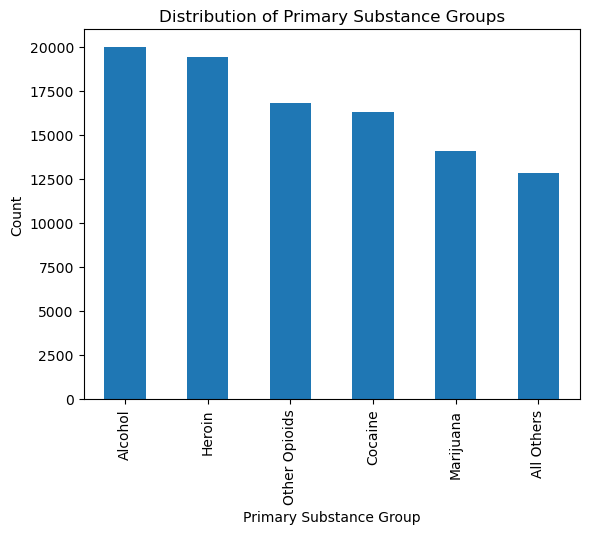

In [6]:
substance = df['Primary Substance Group'].value_counts()
substance.plot(kind='bar')
plt.title('Distribution of Primary Substance Groups')
plt.xlabel('Primary Substance Group')
plt.ylabel('Count')
plt.show()
#This bar chart displays the frequency of each primary substance group within the dataset. 
#The x-axis shows the primary substance group, and the y-axis shows the count of each primary substance group

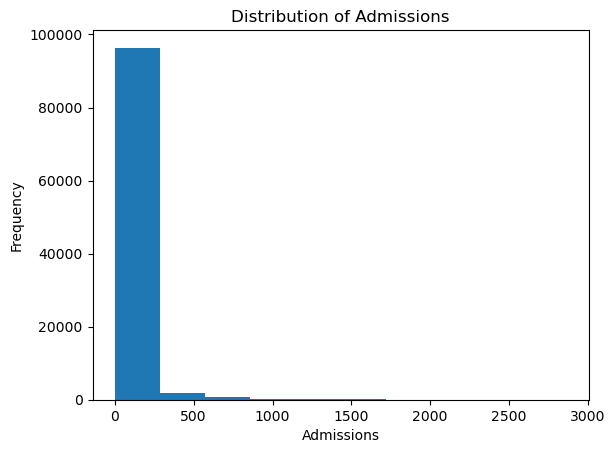

In [7]:
df['Admissions'].plot(kind='hist', bins = 10)
plt.title('Distribution of Admissions')
plt.xlabel('Admissions')
plt.ylabel('Frequency')
plt.show()
#This histogram displays the distribution of admissions within the dataset. 
#The x-axis shows the number of admissions divided into 10 bins, and the y-axis shows the frequency of entries into each bin

## Question 4:
(5 pts) Create a function called annualAdmissions() that calculates the total number of reported admissions that transpired each year, for the entire state of NY and display the results using a line chart. Annotate the chart to show the year with the highest number of admissions.
Execute the function in a new cell. Explain the chart and discuss any patterns or trends that you have observed over time.

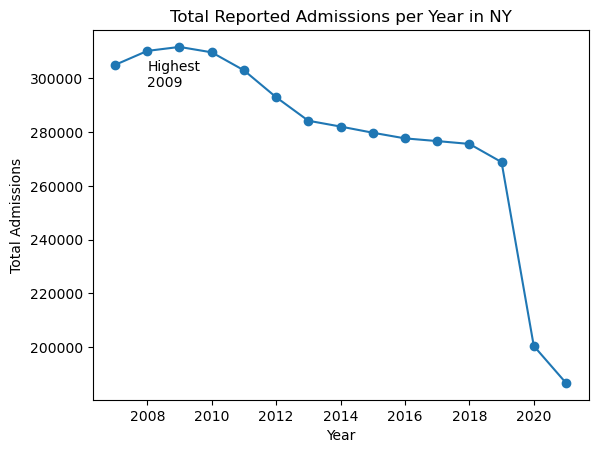

In [8]:
def annualAdmissions():
    admissions = df.groupby('Year')['Admissions'].sum()
    
    admissions.plot(kind='line', marker='o')
    plt.title('Total Reported Admissions per Year in NY')
    plt.xlabel('Year')
    plt.ylabel('Total Admissions')
    
    
    max_admissions_year = admissions.idxmax()
    max_admissions = admissions.max()
    plt.annotate(f'Highest\n{max_admissions_year}', 
                 xy=(max_admissions_year, max_admissions),
                 xytext=(max_admissions_year-1, max_admissions-15000))
    
    plt.show()

annualAdmissions()
#This line chart displays the distribution of admissions each year in NY within the dataset. 
#The x-axis shows the year, and the y-axis shows the number of admissions for that year
#It appears that the peak number of admissions per year in NY was in 2009, and had slowly decreased until 2019. 
# In 2019, the total number of reported admissions per year in NY had began rapidly decreasing. 

## Question 5:
(10 pts) Create a function called annualAdmissionsByCounty(year). The function should take the year as input, filter the data to find all admissions for that year and calculate the proportion of admissions grouped by county. For example, if the year is 2007, the function should calculate the admissions as follows: county A 75%, county B 20% and county C 2.5%, etc. Display a bar chart with the top 10 counties. Using a new cell, visualize the annualAdmissionsByCounty() for the last 10 years. What are the patterns that you have observed?
Note: Ensure that you visualize the results.

In [9]:
def annualAdmissionsByCounty(year):
    df_by_year = df[df['Year'] == year].groupby('County of Program Location')['Admissions'].sum()
    
    admissions_proportion = (df_by_year / df_by_year.sum()) * 100

    top_ten = admissions_proportion.sort_values(ascending=False).head(10)
    
    top_ten.plot(kind='bar')
    plt.title(f'Proportion of Admissions by County in {year}')
    plt.xlabel('County of Program Location')
    plt.ylabel('Proportion of Admissions (%)')

    plt.show()

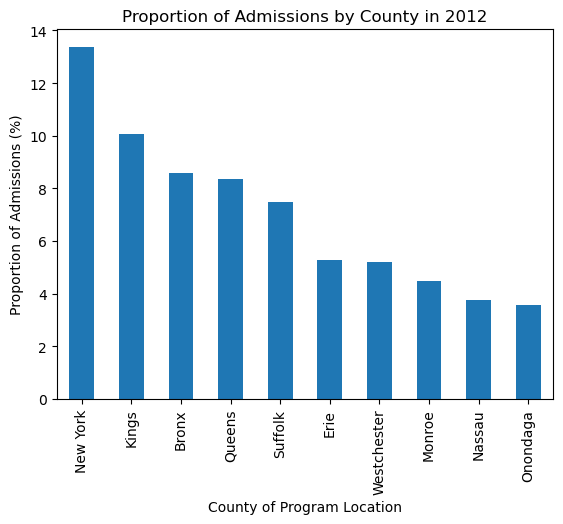

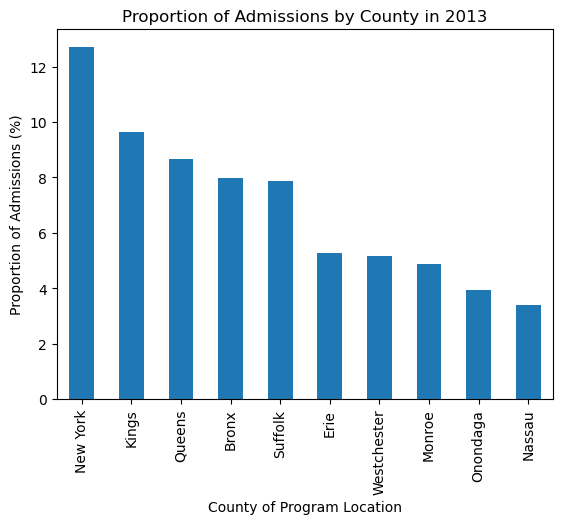

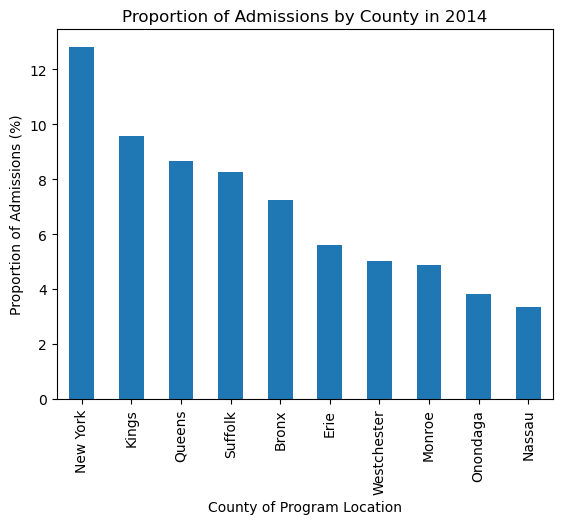

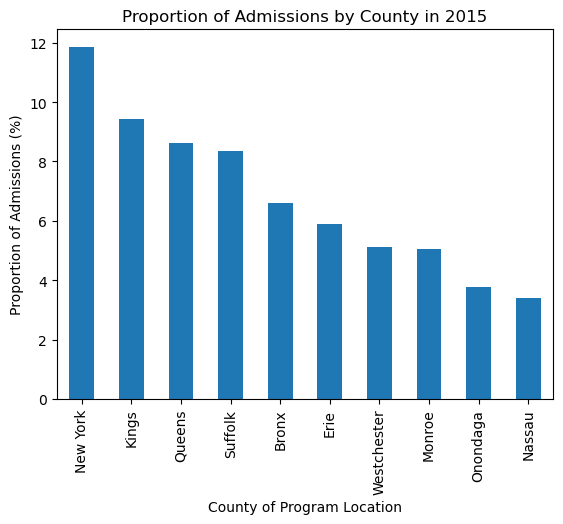

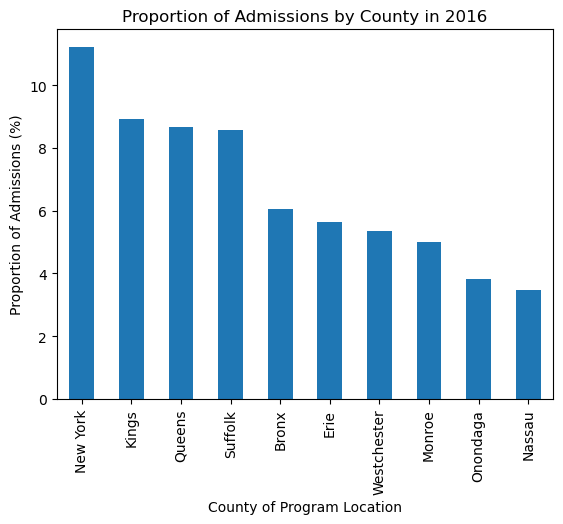

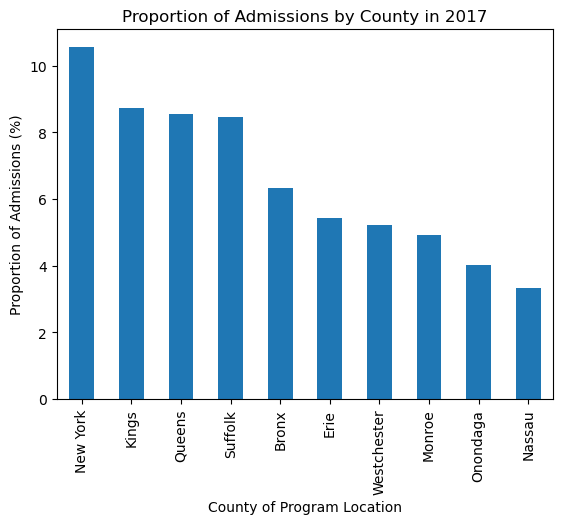

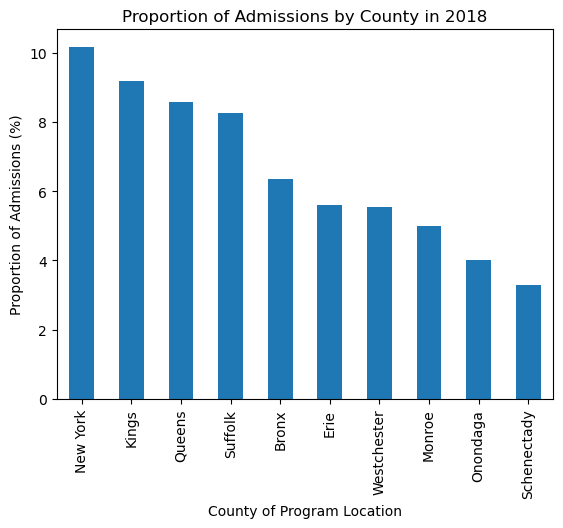

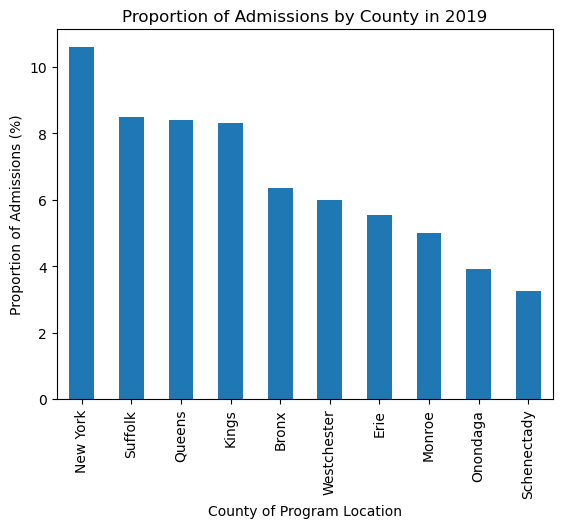

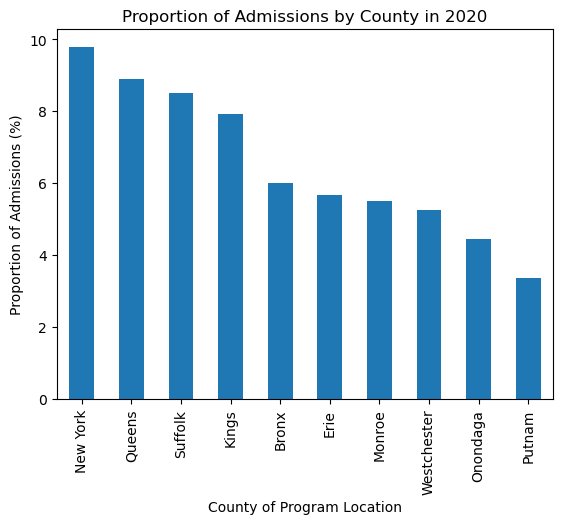

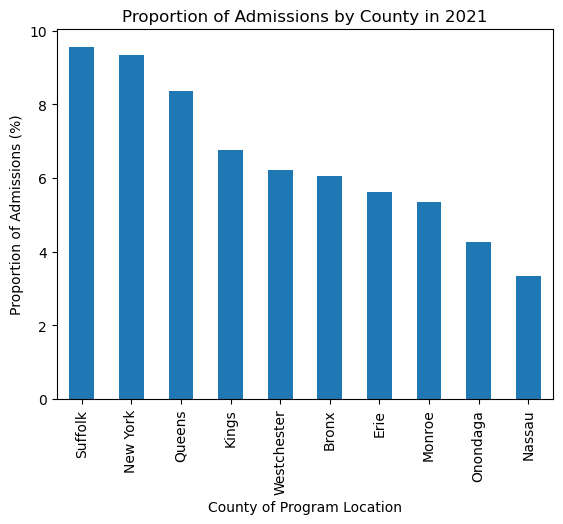

In [10]:
#Only going from 2012 to 2021 since there is no data for after 2021.
for i in range(2012, 2022):
    annualAdmissionsByCounty(i)
    
#Observations:
#Suffolk Count has went from the 5th highest proprtion of admission to the highest proportion of admission.
#The range (max - min) of admissions appears to be decreasing over time. 
#(i.e. the proportion of admissions is devating less per county)
#New York consistently remains in the top 1/2 of proportion of admissions over time.


## Question 6:

(10 pts) Filter the data, and extract all admissions to the various “Rehab” facilities; i.e. you should perform a case-insensitive match for all facilities that include the word rehab, rehabilitation, etc. Using the filtered data, identify which substance is the most prominent among each age group. Visualize and explain the results.

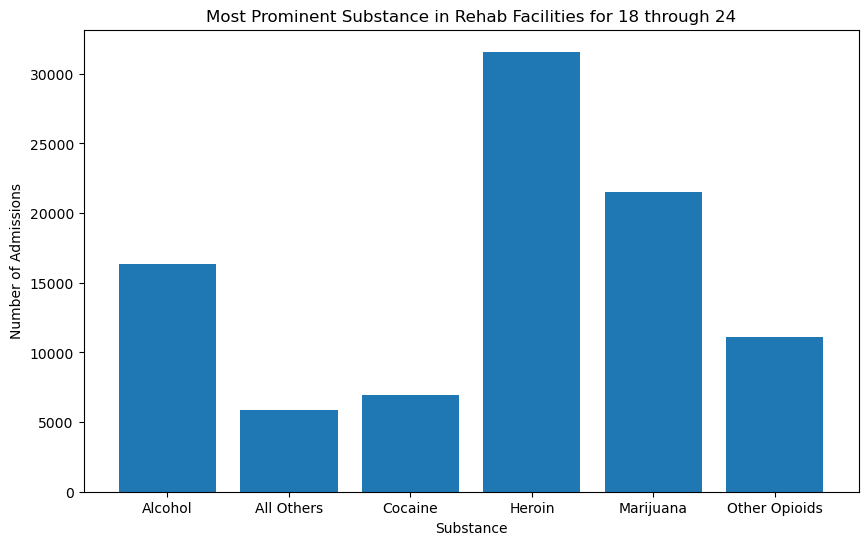

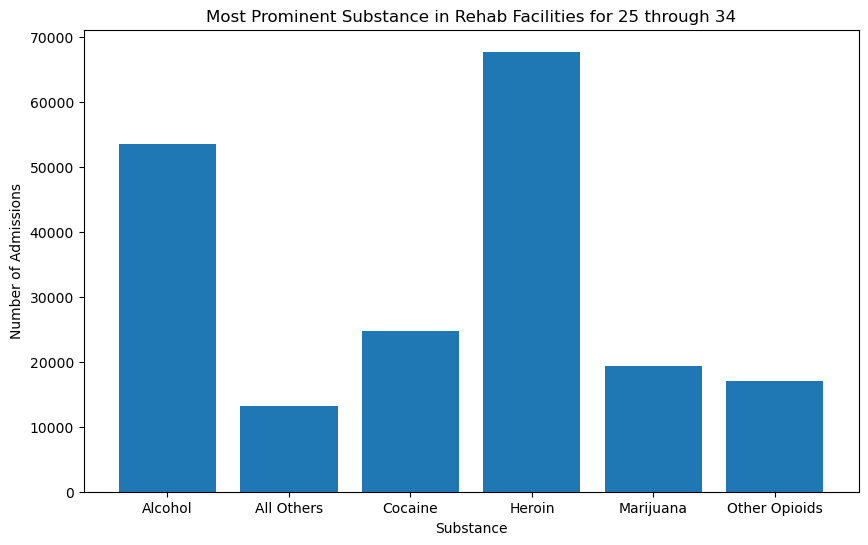

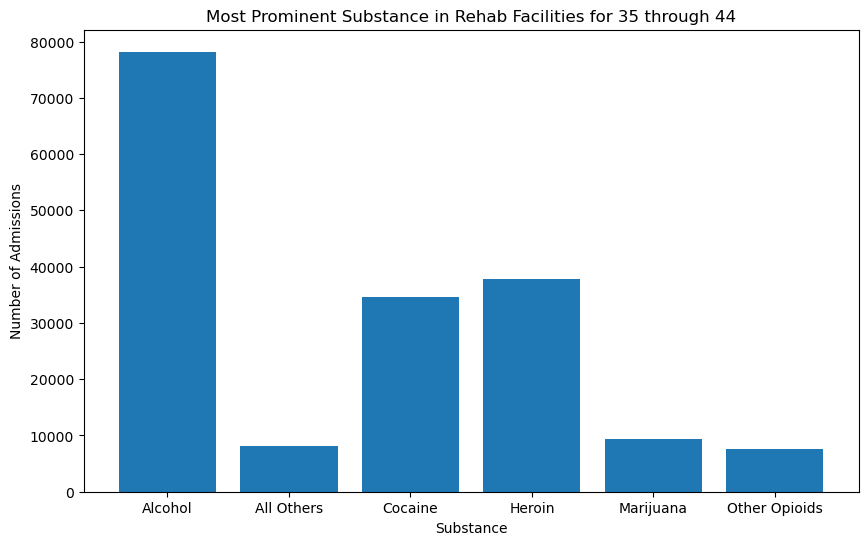

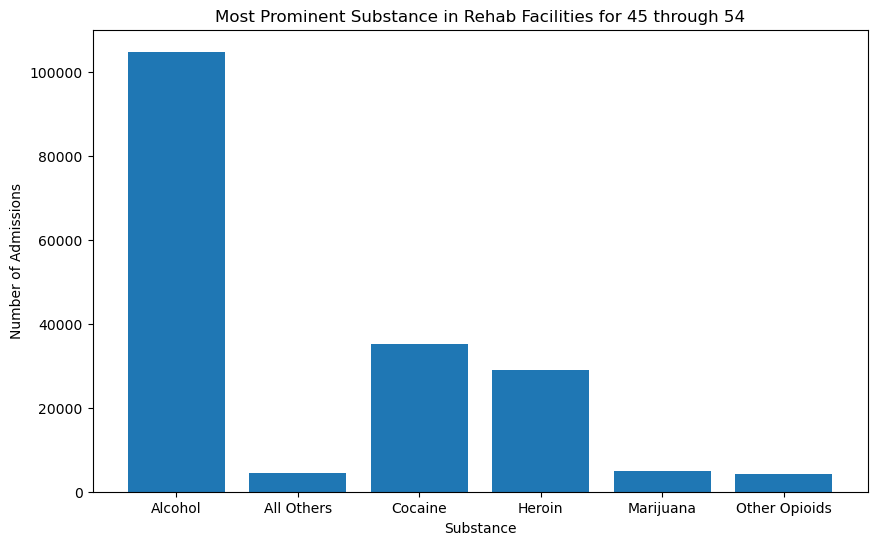

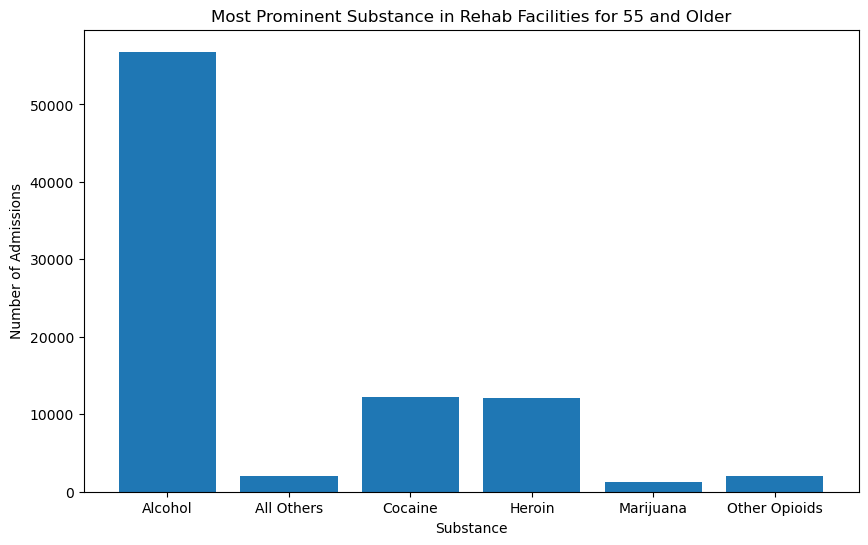

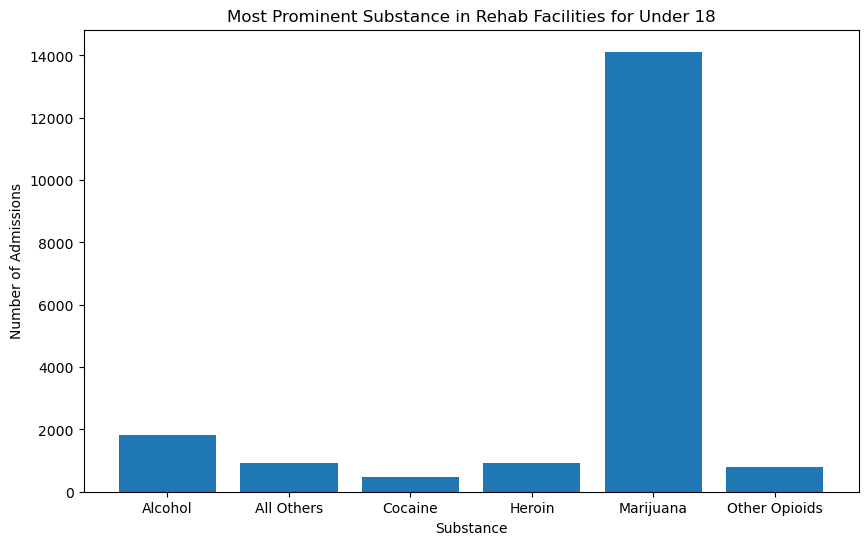

In [11]:
def mostProminentSubstanceInRehab():
    df_rehab = df[df['Service Type'].str.contains('rehab', case=False) | 
                    df['Service Type'].str.contains('rehabilitation', case=False)]
    
    rehab_by_age = df_rehab.groupby(['Age Group', 'Primary Substance Group'])['Admissions'].sum().reset_index()
    
    for age_group in rehab_by_age['Age Group'].unique():
        age_group_data = rehab_by_age[rehab_by_age['Age Group'] == age_group]
        plt.figure(figsize=(10, 6))
        plt.bar(age_group_data['Primary Substance Group'], age_group_data['Admissions'])
        plt.title(f'Most Prominent Substance in Rehab Facilities for {age_group}')
        plt.xlabel('Substance')
        plt.ylabel('Number of Admissions')
        plt.show()
    return df_rehab

df_filtered = mostProminentSubstanceInRehab()
#Most Prominent Substance in Rehab Facilities for 18-24: Heroin
#Most Prominent Substance in Rehab Facilities for 25-34: Heroin
#Most Prominent Substance in Rehab Facilities for 35-44: Alcohol
#Most Prominent Substance in Rehab Facilities for 45-54: Alcohol
#Most Prominent Substance in Rehab Facilities for 55 and Older: Alcohol
#Most Prominent Substance in Rehab Facilities for 17 and under: Marijuana

#It appears that as people grow older, from under 18 to over 55, the more common substance changes from
#Marijuana to herion to alcohol.
#It appears that Marijuana is vastly more popular among those under 18.
#Similarly, Alcohol is vastly more popular than other substances for those 55 and older.

## Question 7

(10 pts) Using the filtered “rehab” data from question 6 above, identify any patterns in the admission to rehab facilities in any 5 counties and substance groups. Explain your observations.

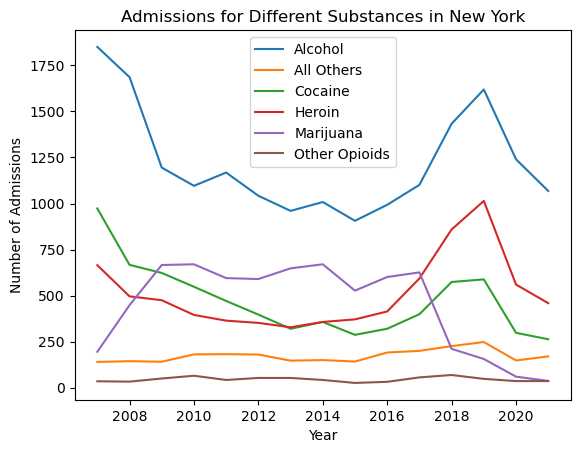

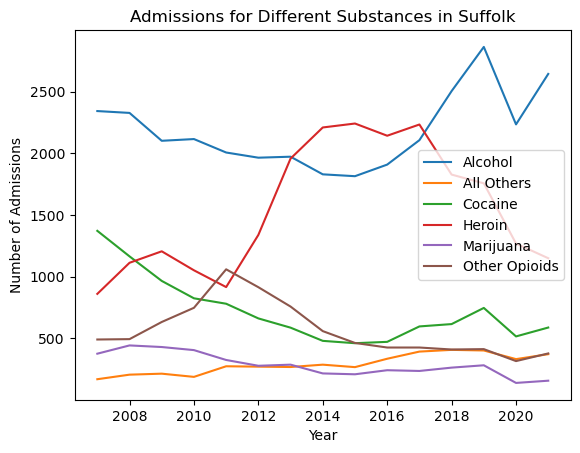

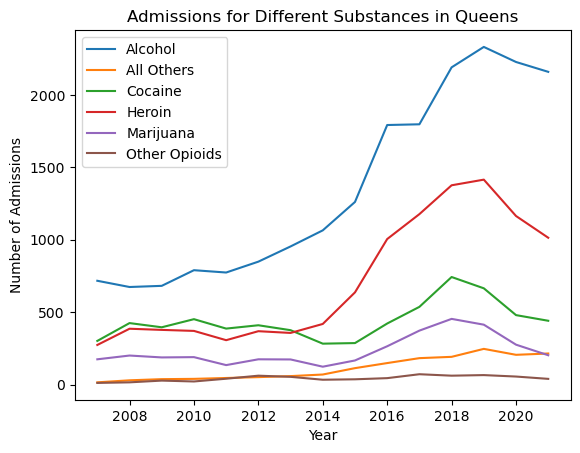

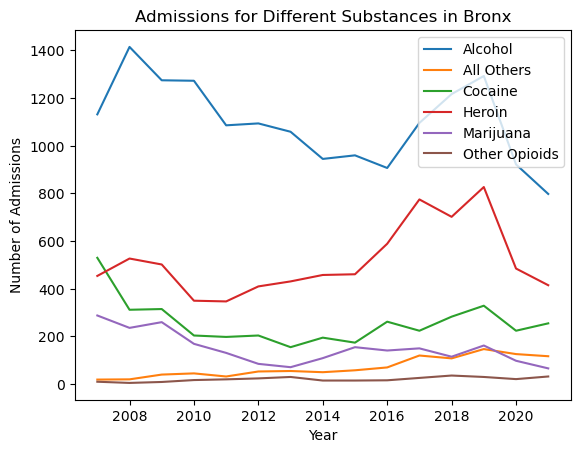

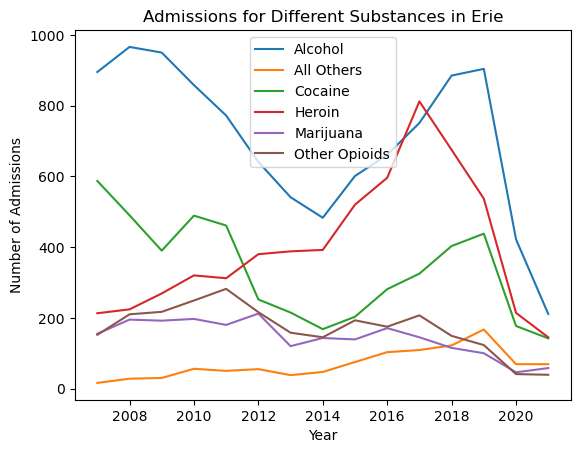

In [12]:
counties = ['New York', 'Suffolk', 'Queens', 'Bronx', 'Erie']

temp = df_filtered[df_filtered['County of Program Location'].isin(counties)].groupby(
    ['County of Program Location', 'Primary Substance Group', 'Year'])['Admissions'].sum().reset_index()

for county in counties:
    county_data = temp[temp['County of Program Location'] == county]
    
    for substance in county_data['Primary Substance Group'].unique():
        substance_data = county_data[county_data['Primary Substance Group'] == substance]
        plt.plot(substance_data['Year'], substance_data['Admissions'], label=substance)

    plt.title(f'Admissions for Different Substances in {county}')
    plt.xlabel('Year')
    plt.ylabel('Number of Admissions')
    plt.legend()
    plt.show()

#Observations:
#Some counties (New York, Queens, Bronx) see Alcohol being consistently the most admitted substance to rehab over the years.
#However, other counties (Suffolk, Erie) see Heroin overtaking Alcohol during some years.
#All five counties saw a spike in Alcohol admissions around 2019.
#In 2017 in New York, Marijuana Admissions decreased rapidly while all other substance use either increased or maintained.
#Unlike the other 4 counties, Queens had a low number of rehab admissions for any substance in the earlier years (2008-2013)
#In general, rehab admissions tend to spike/lull at the same time regardless of county (with exceptions, of course).
#All counties tend to see these substances from most frequent to least frequent admission:
#Alcohol, Heroin, Cocaine, All others, Other Opioids, Marijuana

## Helpful resources 
Don't forget to cite websites which helped you solve a problem in a unique way.  You can do this in markdown near the code or with a simple one-line comment inside the code cell, or you can list them below. 

You do not need to cite the official python documentation.
